In [17]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sktree.stats import FeatureImportanceForestRegressor, PermutationForestRegressor

seed = 12345

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
def linear_model_ancova(sigma_factor=2.0, seed=None):
    r"""Test MIGHT using MSE from linear model simulation.

    See https://arxiv.org/pdf/1904.07830.pdf Figure 1.

    Y = Beta * X_1 + Beta * I(X_6 = 2) + \epsilon
    """
    beta = 10.0
    sigma = 10.0 / sigma_factor
    n_samples = 2200
    n_estimators = 125
    test_size = 0.1
    n_repeats = 500
    metric = "mse"
    permute_per_tree = True
    sample_dataset_per_tree = True

    rng = np.random.default_rng(seed)

    # sample covariates
    X_15 = rng.uniform(0, 1, size=(n_samples, 5))
    X_610 = np.zeros((n_samples, 5))
    for idx in range(5):
        buff = np.argwhere(
            rng.multinomial(1, [1.0 / 3, 1.0 / 3, 1.0 / 3], size=n_samples)
        )[:, 1]

        X_610[:, idx] = buff

    X = np.concatenate((X_15, X_610), axis=1)
    assert X_15.shape == (n_samples, 5)
    assert X_610.shape == (n_samples, 5)
    assert X.shape == (n_samples, 10)

    # sample noise
    epsilon = rng.normal(size=n_samples, loc=0.0, scale=sigma)

    # compute final y of (n_samples,)
    y = beta * X[:, 0] + (beta * (X[:, 5] - 2)) + epsilon

    # initialize hypothesis tester
    est = FeatureImportanceForestRegressor(
        max_features=1.0,
        random_state=seed,
        n_estimators=n_estimators,
        n_jobs=-1,
        permute_per_tree=permute_per_tree,
        sample_dataset_per_tree=sample_dataset_per_tree,
        # bootstrap=True,
        # max_samples=subsample_size
    )
    pvalue_dict = {}

    # test for X_1
    stat, pvalue = est.test(
        X.copy(), y.copy(), [0], metric=metric, n_repeats=n_repeats, test_size=test_size
    )
    print("X1: ", pvalue)
    pvalue_dict["X1"] = pvalue
    # assert pvalue < 0.05, f"pvalue: {pvalue}"

    # test for X_6
    stat, pvalue = est.test(
        X.copy(), y.copy(), [5], metric=metric, n_repeats=n_repeats, test_size=test_size
    )
    print("X6: ", pvalue)
    pvalue_dict["X6"] = pvalue
    # assert pvalue < 0.05, f"pvalue: {pvalue}"

    # test for a few unimportant other X
    for name, covariate_index in zip(["X2", "X7"], [1, 6]):
        # test for X_2, X_7
        stat, pvalue = est.test(
            X.copy(),
            y.copy(),
            [covariate_index],
            metric=metric,
            n_repeats=n_repeats,
            test_size=test_size,
        )
        print("X2/7: ", pvalue)
        pvalue_dict[name] = pvalue
        # assert pvalue > 0.05, f"pvalue: {pvalue}"

    return pvalue_dict


def linear_model_mars():
    pass


def correlated_logit_model():
    pass


def random_forest_model():
    pass

In [25]:
pvalue_dict = defaultdict(list)
rng = np.random.default_rng(seed)

j_space = np.linspace(0.005, 2.25, 9)

for sigma_factor in j_space:
    for idx in range(5):
        new_seed = rng.integers(0, np.iinfo(np.uint32).max, dtype=np.uint32)

        elements_dict = linear_model_ancova(sigma_factor, new_seed)
        for key, value in elements_dict.items():
            pvalue_dict[key].append(value)
        pvalue_dict["sigma_factor"].append(sigma_factor)

df = pd.DataFrame(pvalue_dict)

X1:  1.0
X6:  0.001996007984031936
X2/7:  1.0
X2/7:  1.0
X1:  0.001996007984031936
X6:  0.001996007984031936
X2/7:  0.001996007984031936
X2/7:  0.001996007984031936
X1:  1.0
X6:  1.0
X2/7:  1.0
X2/7:  1.0
X1:  1.0
X6:  1.0
X2/7:  1.0
X2/7:  1.0
X1:  1.0
X6:  0.001996007984031936
X2/7:  1.0
X2/7:  0.001996007984031936
X1:  1.0
X6:  1.0
X2/7:  1.0
X2/7:  1.0
X1:  1.0
X6:  0.001996007984031936
X2/7:  1.0
X2/7:  1.0
X1:  1.0
X6:  0.001996007984031936
X2/7:  1.0
X2/7:  1.0
X1:  1.0
X6:  1.0
X2/7:  1.0
X2/7:  1.0
X1:  1.0
X6:  1.0
X2/7:  1.0
X2/7:  1.0
X1:  1.0
X6:  0.001996007984031936
X2/7:  1.0
X2/7:  0.001996007984031936
X1:  1.0
X6:  0.001996007984031936
X2/7:  1.0
X2/7:  1.0
X1:  1.0
X6:  0.001996007984031936
X2/7:  1.0
X2/7:  1.0
X1:  1.0
X6:  0.001996007984031936
X2/7:  1.0
X2/7:  1.0
X1:  1.0
X6:  0.001996007984031936
X2/7:  1.0
X2/7:  1.0
X1:  1.0
X6:  0.001996007984031936
X2/7:  1.0
X2/7:  1.0
X1:  0.001996007984031936
X6:  0.001996007984031936
X2/7:  1.0
X2/7:  1.0
X1:  0.0019960

In [26]:
print("done")

done


In [27]:
display(df.head())

,X1,X6,X2,X7,sigma_factor
0,1.000000,0.001996,1.000000,1.000000,0.005
1,0.001996,0.001996,0.001996,0.001996,0.005
2,1.000000,1.000000,1.000000,1.000000,0.005
3,1.000000,1.000000,1.000000,1.000000,0.005
4,1.000000,0.001996,1.000000,0.001996,0.005


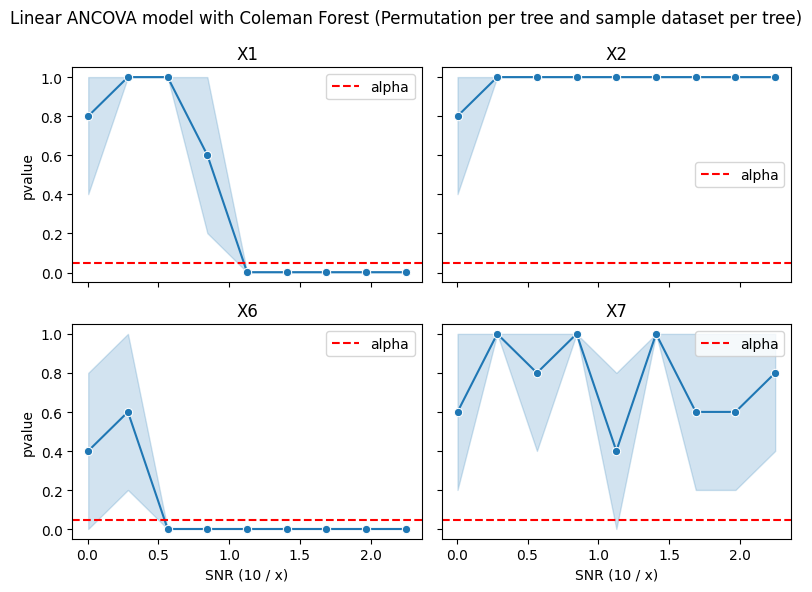

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharey=True, sharex=True)
axs = axs.flatten()

for ax, name in zip(axs, ["X1", "X2", "X6", "X7"]):
    sns.lineplot(data=df, x="sigma_factor", y=name, ax=ax, marker="o")

    ax.axhline([0.05], ls="--", color="red", label="alpha")
    ax.set(title=name, ylabel="pvalue", xlabel="SNR (10 / x)")
    ax.legend()
fig.suptitle(
    "Linear ANCOVA model with Coleman Forest (Permutation per tree and sample dataset per tree)"
)
fig.tight_layout()

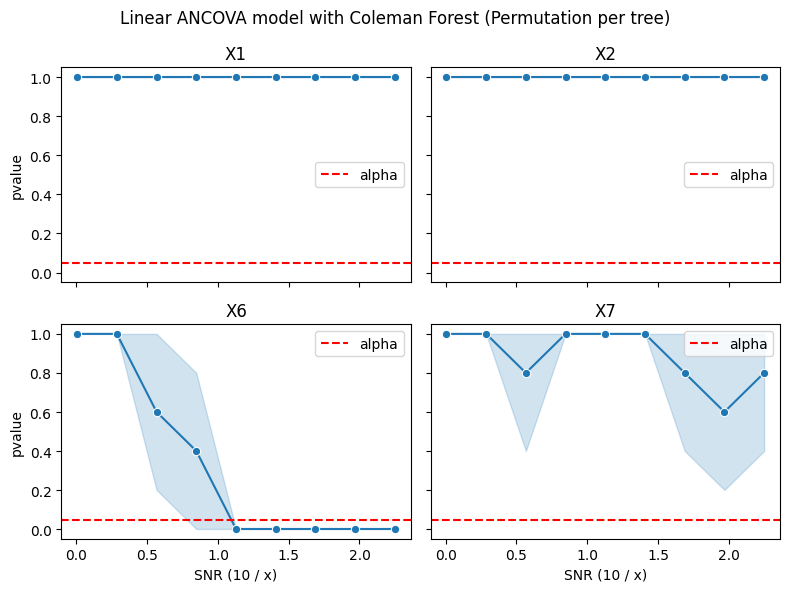

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharey=True, sharex=True)
axs = axs.flatten()

for ax, name in zip(axs, ["X1", "X2", "X6", "X7"]):
    sns.lineplot(data=df, x="sigma_factor", y=name, ax=ax, marker="o")

    ax.axhline([0.05], ls="--", color="red", label="alpha")
    ax.set(title=name, ylabel="pvalue", xlabel="SNR (10 / x)")
    ax.legend()
fig.suptitle("Linear ANCOVA model with Coleman Forest (Permutation per tree)")
fig.tight_layout()

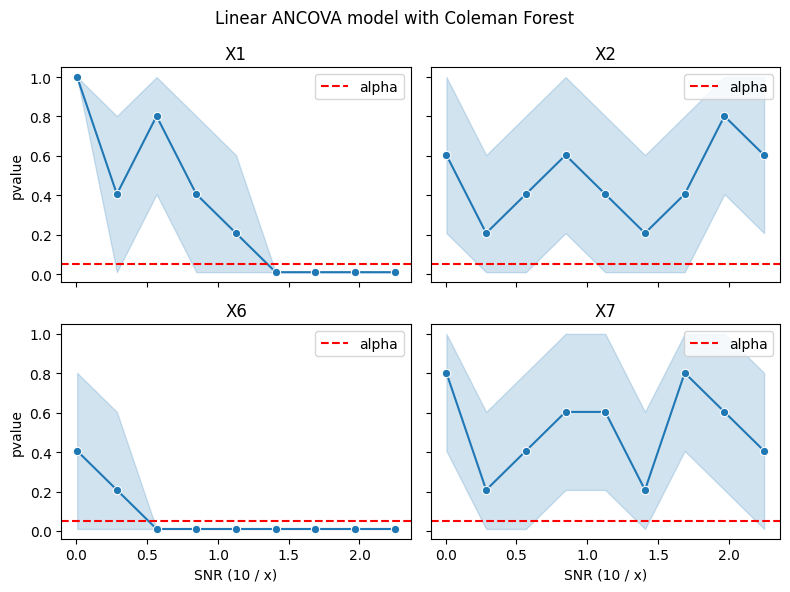

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharey=True, sharex=True)
axs = axs.flatten()

for ax, name in zip(axs, ["X1", "X2", "X6", "X7"]):
    sns.lineplot(data=df, x="sigma_factor", y=name, ax=ax, marker="o")

    ax.axhline([0.05], ls="--", color="red", label="alpha")
    ax.set(title=name, ylabel="pvalue", xlabel="SNR (10 / x)")
    ax.legend()
fig.suptitle("Linear ANCOVA model with Coleman Forest")
fig.tight_layout()

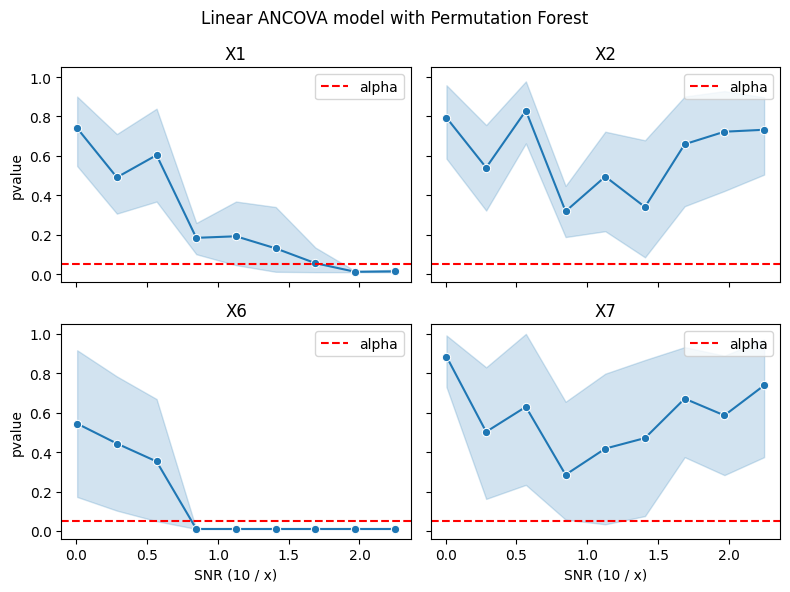

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharey=True, sharex=True)
axs = axs.flatten()

for ax, name in zip(axs, ["X1", "X2", "X6", "X7"]):
    sns.lineplot(data=df, x="sigma_factor", y=name, ax=ax, marker="o")

    ax.axhline([0.05], ls="--", color="red", label="alpha")
    ax.set(title=name, ylabel="pvalue", xlabel="SNR (10 / x)")
    ax.legend()
fig.suptitle("Linear ANCOVA model with Permutation Forest")
fig.tight_layout()